In [304]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [110]:
import numpy as np

In [123]:
df = pd.read_csv('googleplaystore.csv')

### 컬럼 설명
Current Ver = 어플 업데이트 버전
Android Ver = 어플이 돌아가기 위한 핸드폰 최소 성능

In [124]:
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10054,Aurum Blade EX,FAMILY,4.3,28151,17M,"1,000,000+",Free,0,Everyone 10+,Role Playing,"June 4, 2015",1.0.2,2.2 and up
5299,AK 47 Lock Screen,PERSONALIZATION,4.6,5,8.8M,500+,Free,0,Mature 17+,Personalization,"February 11, 2018",1.0,4.0.3 and up
3130,Goibibo - Flight Hotel Bus Car IRCTC Booking App,TRAVEL_AND_LOCAL,4.3,459851,Varies with device,"10,000,000+",Free,0,Everyone,Travel & Local,"August 1, 2018",3.9.7,4.3 and up
7596,Soundtrack Attack,FAMILY,4.3,96045,25M,"5,000,000+",Free,0,Everyone,Action;Action & Adventure,"July 26, 2016",1.0.4,4.1 and up
1104,Chime - Mobile Banking,FINANCE,4.3,5928,22M,"500,000+",Free,0,Everyone,Finance,"July 22, 2018",5.1.1,5.0 and up


In [305]:
df.isnull().sum()
# Rating null값이 많은데, 상관관계를 아직 알 수 없음
# 추후에 다시 봐야 함

App                         0
Rating                   1474
Reviews                     0
Size                     1695
Installs                    0
Type                        1
Price                       0
Content Rating              0
Genres                      0
Last Updated                0
Current Ver                 8
Android Ver              1365
upYear                      0
upMonth                     0
upMonth_n                   0
upYM                        0
C_ART_AND_DESIGN            0
C_AUTO_AND_VEHICLES         0
C_BEAUTY                    0
C_BOOKS_AND_REFERENCE       0
C_BUSINESS                  0
C_COMICS                    0
C_COMMUNICATION             0
C_DATING                    0
C_EDUCATION                 0
C_ENTERTAINMENT             0
C_EVENTS                    0
C_FAMILY                    0
C_FINANCE                   0
C_FOOD_AND_DRINK            0
C_GAME                      0
C_HEALTH_AND_FITNESS        0
C_HOUSE_AND_HOME            0
C_LIBRARIE

## 밀린 데이터 한줄 수정


In [139]:
df[df['Installs']=='Free']

df.loc[df['Installs']=='Free', 'Category'] = 'PHOTOGRAPHY'

df.loc[df['App']=='Life Made WI-Fi Touchscreen Photo Frame', 'Rating'] = '1.9'
df.loc[df['App']=='Life Made WI-Fi Touchscreen Photo Frame', 'Reviews'] = '19'
df.loc[df['App']=='Life Made WI-Fi Touchscreen Photo Frame', 'Size'] = '3.0M'
df.loc[df['App']=='Life Made WI-Fi Touchscreen Photo Frame', 'Installs'] = '1000+'
df.loc[df['App']=='Life Made WI-Fi Touchscreen Photo Frame', 'Type'] = 'Free'
df.loc[df['App']=='Life Made WI-Fi Touchscreen Photo Frame', 'Price'] = '0'
df.loc[df['App']=='Life Made WI-Fi Touchscreen Photo Frame', 'Content Rating'] = 'Everyone'
df.loc[df['App']=='Life Made WI-Fi Touchscreen Photo Frame', 'Genres'] = 'Photography'
df.loc[df['App']=='Life Made WI-Fi Touchscreen Photo Frame', 'Last Updated'] = 'February 11, 2018'
df.loc[df['App']=='Life Made WI-Fi Touchscreen Photo Frame', 'Current Ver'] = '1.0.19'
df.loc[df['App']=='Life Made WI-Fi Touchscreen Photo Frame', 'Android Ver'] = '4.0 and up'

df[df['App']=='Life Made WI-Fi Touchscreen Photo Frame']

df['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
1000+                1
0                    1
Name: Installs, dtype: int64

# Last Updated 년/월

In [142]:
df['upYear'] = df['Last Updated'].apply(lambda x: x[ -4:])

In [143]:
df['upMonth'] = df['Last Updated'].apply(lambda x: x.split(" ")[0])

In [144]:
import calendar
dic = dict((v,k) for k,v in enumerate(calendar.month_abbr))
dic

{'': 0,
 'Jan': 1,
 'Feb': 2,
 'Mar': 3,
 'Apr': 4,
 'May': 5,
 'Jun': 6,
 'Jul': 7,
 'Aug': 8,
 'Sep': 9,
 'Oct': 10,
 'Nov': 11,
 'Dec': 12}

In [145]:
df['upMonth'] = df['upMonth'].apply(lambda x: x[:3])

In [149]:
df['upMonth'] = df['upMonth'].transform(lambda x : dic[x])

In [151]:
df['upYear'] = df['upYear'].apply(lambda x: int(x))

In [152]:
df['upYM'] = df['upYear'] + df['upMonth']/100

In [155]:
df[df['upYear']==2018]['upYM'].unique()
# 데이터 업데이트 마지막은 2018년 8월

array([2018.01, 2018.08, 2018.06, 2018.04, 2018.07, 2018.03, 2018.05,
       2018.02])

# Category 살펴보기

In [69]:
df['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [71]:
df['Type'].value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

# [Installs] to int 

In [156]:
df.loc[df['Installs'] == '0', 'Installs'] = '0+'

In [157]:
df['Installs'] = df['Installs'].apply(lambda x : x[:-1])

In [158]:
df['Installs'] = df['Installs'].apply(lambda x : x.replace(',', ""))

# Size 단위 통일

In [159]:
df['Size'].value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
569k                     1
25k                      1
857k                     1
240k                     1
280k                     1
Name: Size, Length: 461, dtype: int64

In [160]:
df['Size'] = df['Size'].apply(lambda x : x[:-1] if x[-1] == 'k' else x[:-1] + '0')

In [161]:
df.loc[df['Size']=='Varies with devic0', 'Size'] = np.nan

In [162]:
df['Size'].value_counts()

110    198
120    196
140    194
130    191
150    184
      ... 
872      1
779      1
626      1
186      1
97       1
Name: Size, Length: 432, dtype: int64

# Price 전처리

In [163]:
df['Price'].value_counts()

0          10041
$0.99        148
$2.99        129
$1.99         73
$4.99         72
           ...  
$14.00         1
$400.00        1
$74.99         1
$18.99         1
$1.29          1
Name: Price, Length: 92, dtype: int64

In [164]:
df['Price'] = df['Price'].apply(lambda x : x.replace('$', ""))

In [165]:
df['Price'].value_counts()

0         10041
0.99        148
2.99        129
1.99         73
4.99         72
          ...  
2.90          1
394.99        1
19.90         1
1.61          1
37.99         1
Name: Price, Length: 92, dtype: int64

# Version 소수점 한자리까지만 살리기

In [202]:
df['Android Ver2'] = df['Android Ver'].replace('Varies with device', np.nan)

In [214]:
df.loc[df['Current Ver'] == 'Varies with device', 'Current Ver'] = np.nan
df['Current Ver'] = df['Current Ver'].astype('str')


In [229]:
df['Current Ver'].sample(50)

1235      9.15.0.2020
7585            1.1.1
5488          1.0.0.4
6390             1.07
3316            6.0.1
8841              5.1
9539            1.2.1
4137              nan
10428           1.0.6
6687              nan
1846            1.8.2
1117              nan
2149          2.19.01
5696              nan
836               nan
4775            1.4.7
6349           2.1.10
7196            1.1.0
4262            7.1.1
1653     2.347.225742
8006             2.28
2240          3.14.15
3412             11.0
9284            1.1.3
2600            2.1.3
8887             14.0
8422            3.4.5
7126            4.3.6
2088     2.347.225742
3574              nan
9414             0.62
360      69.0.3497.24
689               8.2
5595            2.3.5
2315              nan
2732              nan
773              2.48
4193              2.0
1595            7.0.8
1856     12.0.4.62276
1513            2.1.0
9976              nan
4813             1.77
890       2.3.34 Prod
731               nan
6221      

In [290]:
df['Current Ver'] = df['Current Ver'].apply(lambda x: x if x is None
                                                 else x if len(x) == 1
                                                 else x.split('.')[0])

TypeError: object of type 'float' has no len()

In [284]:
df['Current Ver'].unique()

array(['1', '2', 'nan', '6', '3', '5', '4', '11', '0', '8', '10', '18',
       '9', '15', '14', '7', '99', '12', '37', '24', '47', 'R6', '69',
       '42', '196', '2018', '20', '13', 'v1', '01', '43', '16',
       'Cannonau 3', 'p5', '112', 'Public', '220', '858', 'v3',
       'Version:6', '02', '3196', '5423', '19', '1_39_93', '79', '108',
       '57', '60', '149', '37893', '20180609', '28', '25', '300000', 'PN',
       'Initial', 'T4', '50', '27', '29', '584', '22', '71', '1004', '06',
       '2017', '17', '53', 'v5', 'MyMetro_HTML_2', 'v8', 'v7', '32',
       '20180517', 'v150', '40', '68', 'FreeTimeApp-aosp_v3',
       'Natalia Studio Development', '30', '116', '04', '27500000',
       'version 0', '5055', 'a', '31', '1009001', '1900001', 'v8[1', '23',
       '1805', '1,01', 'v2018', 'H7SubTV0', 'v2', '263', '65',
       'acremotecontrol18', 'v67_slk3',
       'airConditionerMaintenance_13112015', '11;11',
       'acremotecontrol-v7', '1255162018', 'v4', '117', 'cli-6',
       'Ver

# 안드로이드 버전

In [292]:
df2 = pd.read_csv('googleplaystore.csv')
df['Android Ver'] = df2['Android Ver']

In [293]:
df['Android Ver']

0              4.0.3 and up
1              4.0.3 and up
2              4.0.3 and up
3                4.2 and up
4                4.4 and up
                ...        
10836            4.1 and up
10837            4.1 and up
10838            2.2 and up
10839    Varies with device
10840    Varies with device
Name: Android Ver, Length: 10841, dtype: object

In [294]:
df['Android Ver'] = df['Android Ver'].replace('Varies with device', np.nan)

In [295]:
df['Android Ver'] = df['Android Ver'].astype('str')

In [296]:
# df['Android Ver'] = df['Android Ver'].replace('and up', '') 

In [297]:
df['Android Ver'].apply(lambda x : x.replace('and up', ''))

0        4.0.3 
1        4.0.3 
2        4.0.3 
3          4.2 
4          4.4 
          ...  
10836      4.1 
10837      4.1 
10838      2.2 
10839       nan
10840       nan
Name: Android Ver, Length: 10841, dtype: object

In [298]:
df['Android Ver'] = df['Android Ver'].apply(lambda x: x if x is None
                                                 else x if len(x) <= 3
                                                 else x[:3])

# 카테고리 더미코딩

In [166]:
df = pd.get_dummies(df, columns=['Category'], prefix='C')

In [301]:
df['Reviews'] = df['Reviews'].apply(lambda x: float(x))
df['Size'] = df['Size'].apply(lambda x: float(x))
df['Installs'] = df['Installs'].apply(lambda x: float(x))
df['Price'] = df['Price'].apply(lambda x: float(x))
# df['Current Ver'] = df['Current Ver'].apply(lambda x: float(x))
df['Android Ver'] = df['Android Ver'].apply(lambda x: float(x))

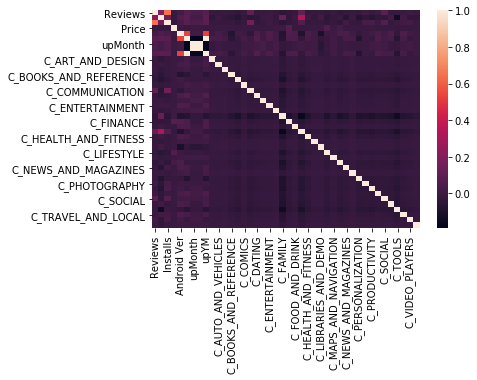

In [303]:
corr = df.corr()
sns.heatmap(corr)